# Importar dados

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
path = '/content/student_depression_dataset.csv'
dados = pd.read_csv(path)
dados.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


# Análise das colunas

In [67]:
def analise_visual_colunas( coluna, titulo, x_label, y_label):
  dados_coluna = dados[coluna].value_counts()
  dados_coluna.plot(kind='bar', figsize=(7,4), color='skyblue')
  #dados_coluna.plot(kind='pie', figsize=(12,4), color='skyblue')
  plt.title(titulo)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xticks(rotation=0)
  plt.tight_layout()
  for i, v in enumerate(dados_coluna):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
  plt.show()

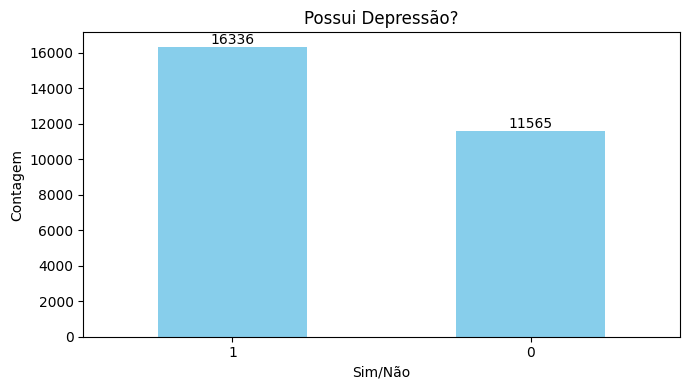

In [68]:
 analise_visual_colunas('Depression', 'Possui Depressão?', 'Sim/Não','Contagem')

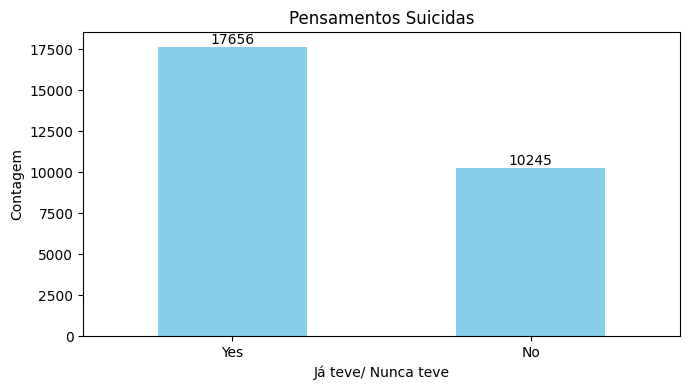

In [69]:
analise_visual_colunas('Have you ever had suicidal thoughts ?', 'Pensamentos Suicidas', 'Já teve/ Nunca teve','Contagem')

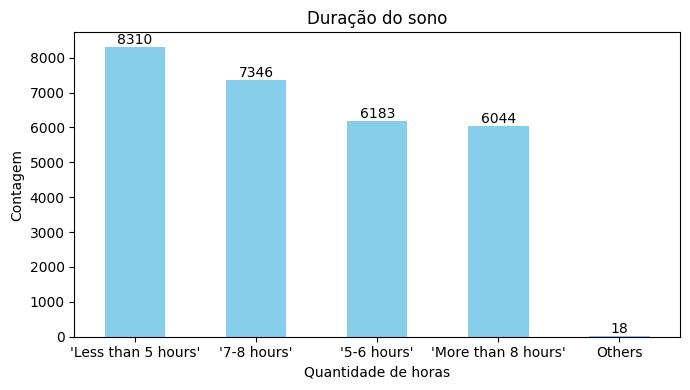

In [70]:
analise_visual_colunas('Sleep Duration', 'Duração do sono', 'Quantidade de horas','Contagem')


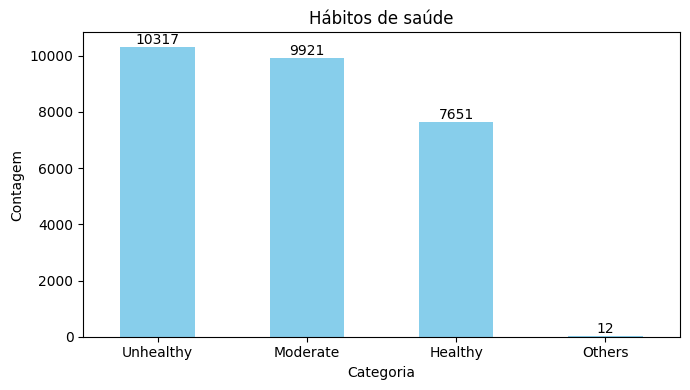

In [71]:
analise_visual_colunas('Dietary Habits', 'Hábitos de saúde', 'Categoria','Contagem')

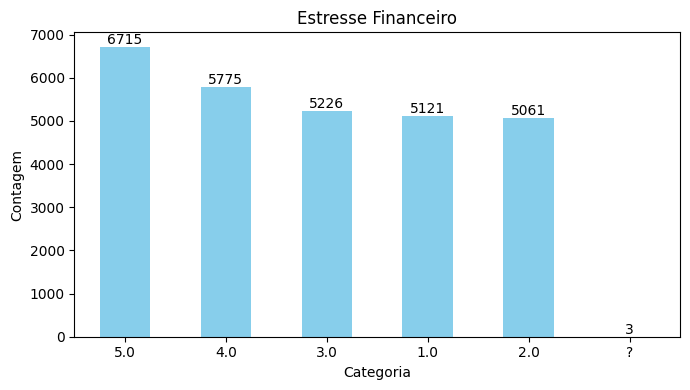

In [72]:
#Nesa análise é possível perceber a necessidade de corrigir os dados, uma vez que
#Uma das categorias é marcada por "?"
analise_visual_colunas('Financial Stress', 'Estresse Financeiro', 'Categoria','Contagem')

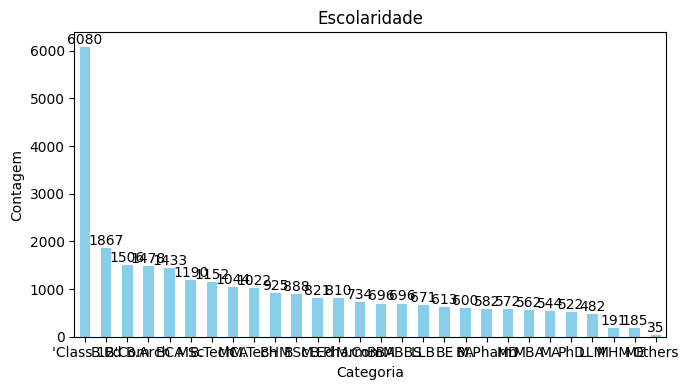

In [73]:
analise_visual_colunas('Degree', 'Escolaridade', 'Categoria','Contagem')

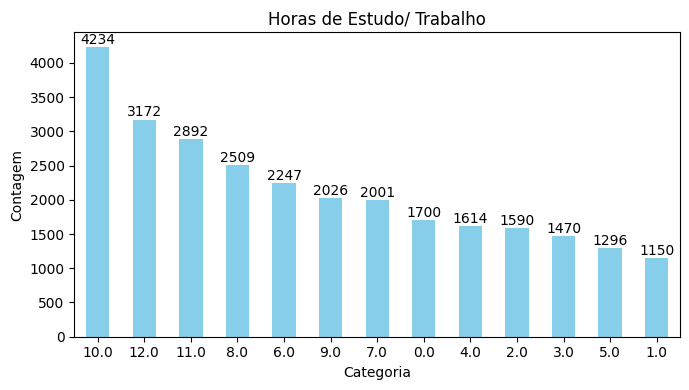

In [74]:
analise_visual_colunas('Work/Study Hours', 'Horas de Estudo/ Trabalho', 'Categoria','Contagem')

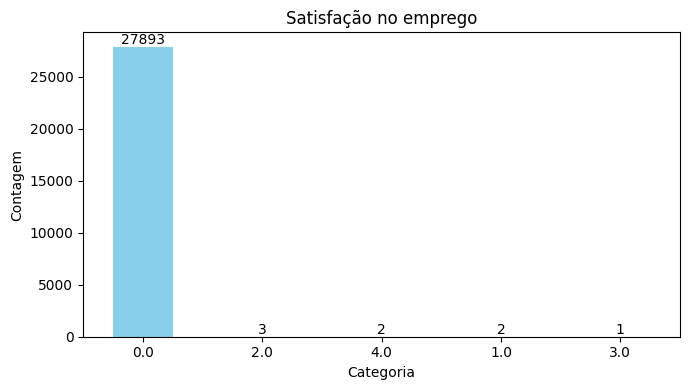

In [75]:
analise_visual_colunas('Job Satisfaction', 'Satisfação no emprego', 'Categoria','Contagem')

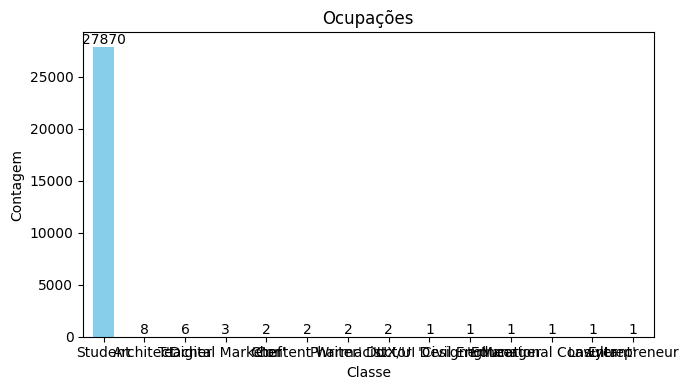

In [76]:
analise_visual_colunas('Profession', 'Ocupações', 'Classe', 'Contagem')

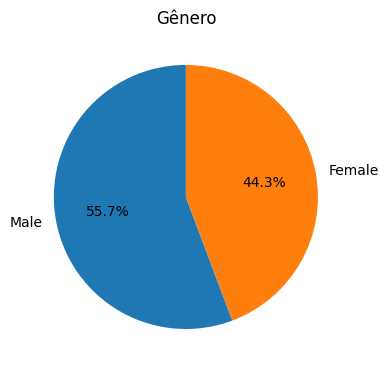

In [77]:
dados['Gender'].value_counts().plot(kind='pie',
                             figsize=(4, 4),
                             autopct='%1.1f%%',
                             startangle=90)

plt.title('Gênero')
plt.ylabel('')
plt.tight_layout()
plt.show()

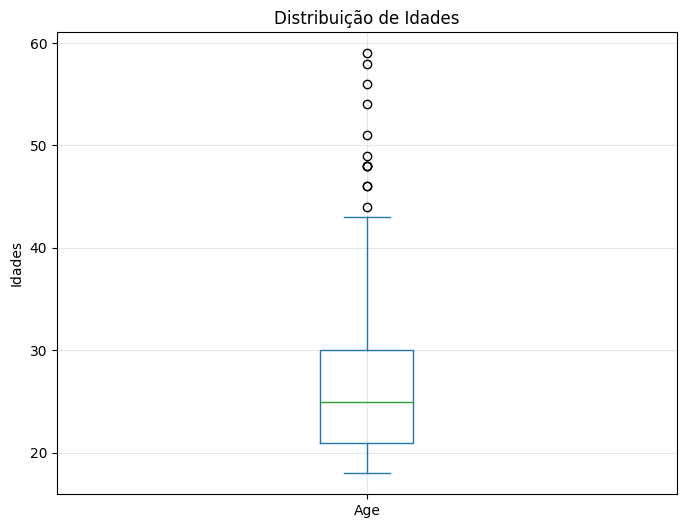

In [78]:
plt.figure(figsize=(8, 6))
dados['Age'].plot(kind='box')
plt.title('Distribuição de Idades')
plt.ylabel('Idades')
plt.grid(True, alpha=0.3)
plt.show()

# Codificar as colunas categóricas

In [79]:
le = LabelEncoder()
colunas_categoricas = ['Gender', 'City', 'Degree','Dietary Habits', 'Sleep Duration', 'Profession', 'Have you ever had suicidal thoughts ?','Family History of Mental Illness' ]

In [80]:
for col in colunas_categoricas:
    print(col, '----------------------------')
    le.fit(dados[col])
    for i, classe in enumerate(le.classes_):
      print(f"{classe}: {i}")

Gender ----------------------------
Female: 0
Male: 1
City ----------------------------
'Less Delhi': 0
'Less than 5 Kalyan': 1
3.0: 2
Agra: 3
Ahmedabad: 4
Bangalore: 5
Bhavna: 6
Bhopal: 7
Chennai: 8
City: 9
Delhi: 10
Faridabad: 11
Gaurav: 12
Ghaziabad: 13
Harsh: 14
Harsha: 15
Hyderabad: 16
Indore: 17
Jaipur: 18
Kalyan: 19
Kanpur: 20
Khaziabad: 21
Kibara: 22
Kolkata: 23
Lucknow: 24
Ludhiana: 25
M.Com: 26
M.Tech: 27
ME: 28
Meerut: 29
Mihir: 30
Mira: 31
Mumbai: 32
Nagpur: 33
Nalini: 34
Nalyan: 35
Nandini: 36
Nashik: 37
Patna: 38
Pune: 39
Rajkot: 40
Rashi: 41
Reyansh: 42
Saanvi: 43
Srinagar: 44
Surat: 45
Thane: 46
Vaanya: 47
Vadodara: 48
Varanasi: 49
Vasai-Virar: 50
Visakhapatnam: 51
Degree ----------------------------
'Class 12': 0
B.Arch: 1
B.Com: 2
B.Ed: 3
B.Pharm: 4
B.Tech: 5
BA: 6
BBA: 7
BCA: 8
BE: 9
BHM: 10
BSc: 11
LLB: 12
LLM: 13
M.Com: 14
M.Ed: 15
M.Pharm: 16
M.Tech: 17
MA: 18
MBA: 19
MBBS: 20
MCA: 21
MD: 22
ME: 23
MHM: 24
MSc: 25
Others: 26
PhD: 27
Dietary Habits ----------------

In [81]:
le = LabelEncoder()
for col in colunas_categoricas:
    dados[col] = le.fit_transform(dados[col])
dados.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,1.0,0,1
1,8,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,2.0,1,0
2,26,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,1.0,1,0
3,30,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,5.0,1,1
4,32,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,1.0,0,0
5,33,1,29.0,39,12,2.0,0.0,5.70,3.0,0.0,2,0,27,0,4.0,1.0,0,0
6,52,1,30.0,46,12,3.0,0.0,9.54,4.0,0.0,1,0,11,0,1.0,2.0,0,0
7,56,0,30.0,8,12,2.0,0.0,8.04,4.0,0.0,2,3,0,0,0.0,1.0,1,0
8,59,1,28.0,33,12,3.0,0.0,9.79,1.0,0.0,1,1,3,1,12.0,3.0,0,1
9,62,1,31.0,37,12,2.0,0.0,8.38,3.0,0.0,2,1,12,1,2.0,5.0,0,1


In [82]:
#dados.drop('City', axis=1, inplace=True)
dados.drop(['id','Work Pressure','Job Satisfaction'], axis=1, inplace=True)

In [83]:
dados.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Gender,27901.0,0.56,0.50,0.0,0.00,1.00,1.00,1.0
Age,27901.0,25.82,4.91,18.0,21.00,25.00,30.00,59.0
City,27901.0,27.22,15.49,0.0,16.00,24.00,44.00,51.0
Profession,27901.0,11.99,0.22,0.0,12.00,12.00,12.00,13.0
Academic Pressure,27901.0,3.14,1.38,0.0,2.00,3.00,4.00,5.0
CGPA,27901.0,7.66,1.47,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.94,1.36,0.0,2.00,3.00,4.00,5.0
Sleep Duration,27901.0,1.51,1.06,0.0,1.00,2.00,2.00,4.0
Dietary Habits,27901.0,1.47,1.24,0.0,0.00,1.00,3.00,3.0
Degree,27901.0,8.95,8.32,0.0,1.00,7.00,16.00,27.0


In [84]:
dados['Financial Stress'].value_counts()

,count
Financial Stress,
5.0,6715
4.0,5775
3.0,5226
1.0,5121
2.0,5061
?,3


In [85]:
#Corrigindo o valor "?" que aparece na coluna Financial Stress 3 vezes.
dados['Financial Stress'].replace('?',0, inplace=True)
dados['Financial Stress'].value_counts()

/tmp/ipython-input-4093196175.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Financial Stress'].replace('?',0, inplace=True)


,count
Financial Stress,
5.0,6715
4.0,5775
3.0,5226
1.0,5121
2.0,5061
0,3


<Axes: >

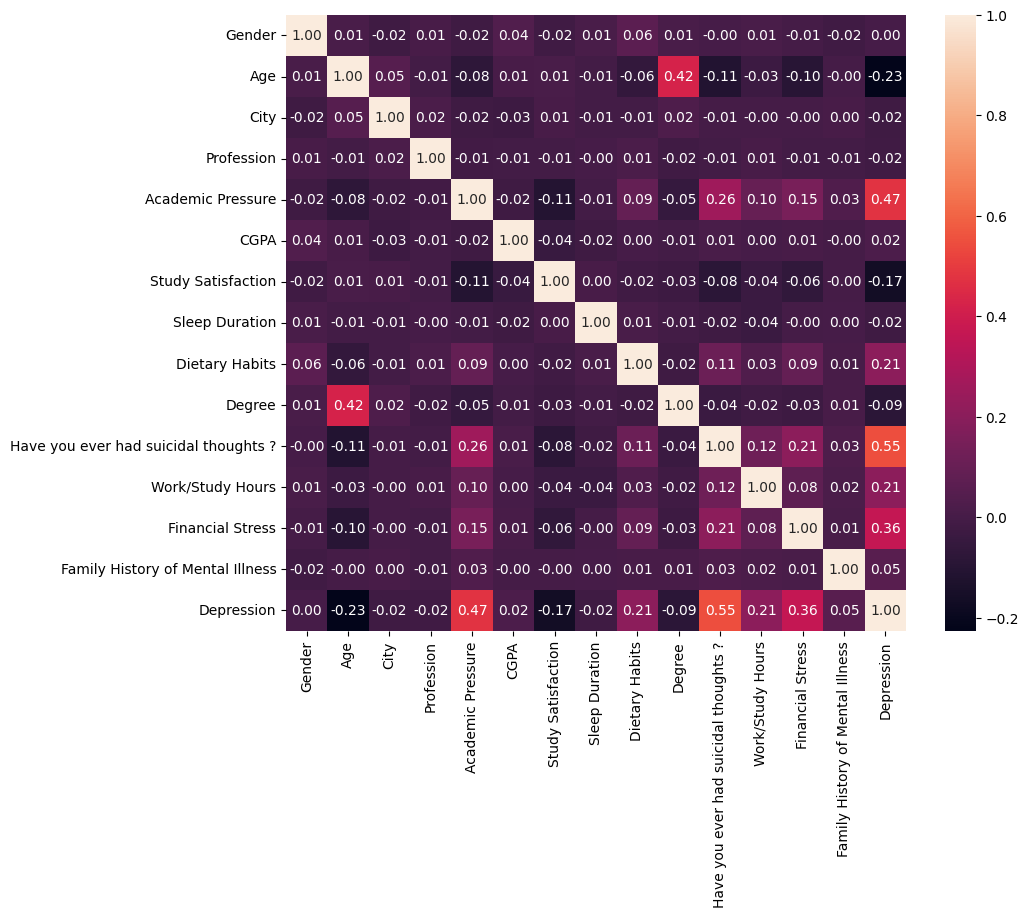

In [86]:
#Representação visual da correlação entre categorias.
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), annot=True, fmt=".2f")

## Função para testar modelos

In [87]:
#Importar métricas para avaliar os modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [88]:
#Função para realizar predições, em cima dos modelos, realizando diversas métricas.
#O foco dessa função é para prever casos de depressão.
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test)

  # Acurácia
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Sem Depressão', 'Com Depressão'])
  ax.yaxis.set_ticklabels(['Sem Depressão', 'Com Depressão'])
  plt.show()


In [89]:
#Função para realizar predições, em cima dos modelos, realizando diversas métricas.
#O foco dessa função é para prever casos de pensamentos suicidas.
def predict_and_evaluate_suicide(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste

  # Acurácia
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  confMatrix = confusion_matrix(y_test, y_pred)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Sem Pensamentos', 'Com Pensamentos'])
  ax.yaxis.set_ticklabels(['Sem Pensamentos', 'Com Pensamentos'])
  plt.show()

# Separando conjuntos de treino e teste Depressão

In [90]:
#Separar os conjuntos X e Y.
X = dados.drop('Depression', axis=1)
Y = dados['Depression']

In [91]:
print("X: ",X.shape)
print("Y: ",Y.shape)

X:  (27901, 14)
Y:  (27901,)


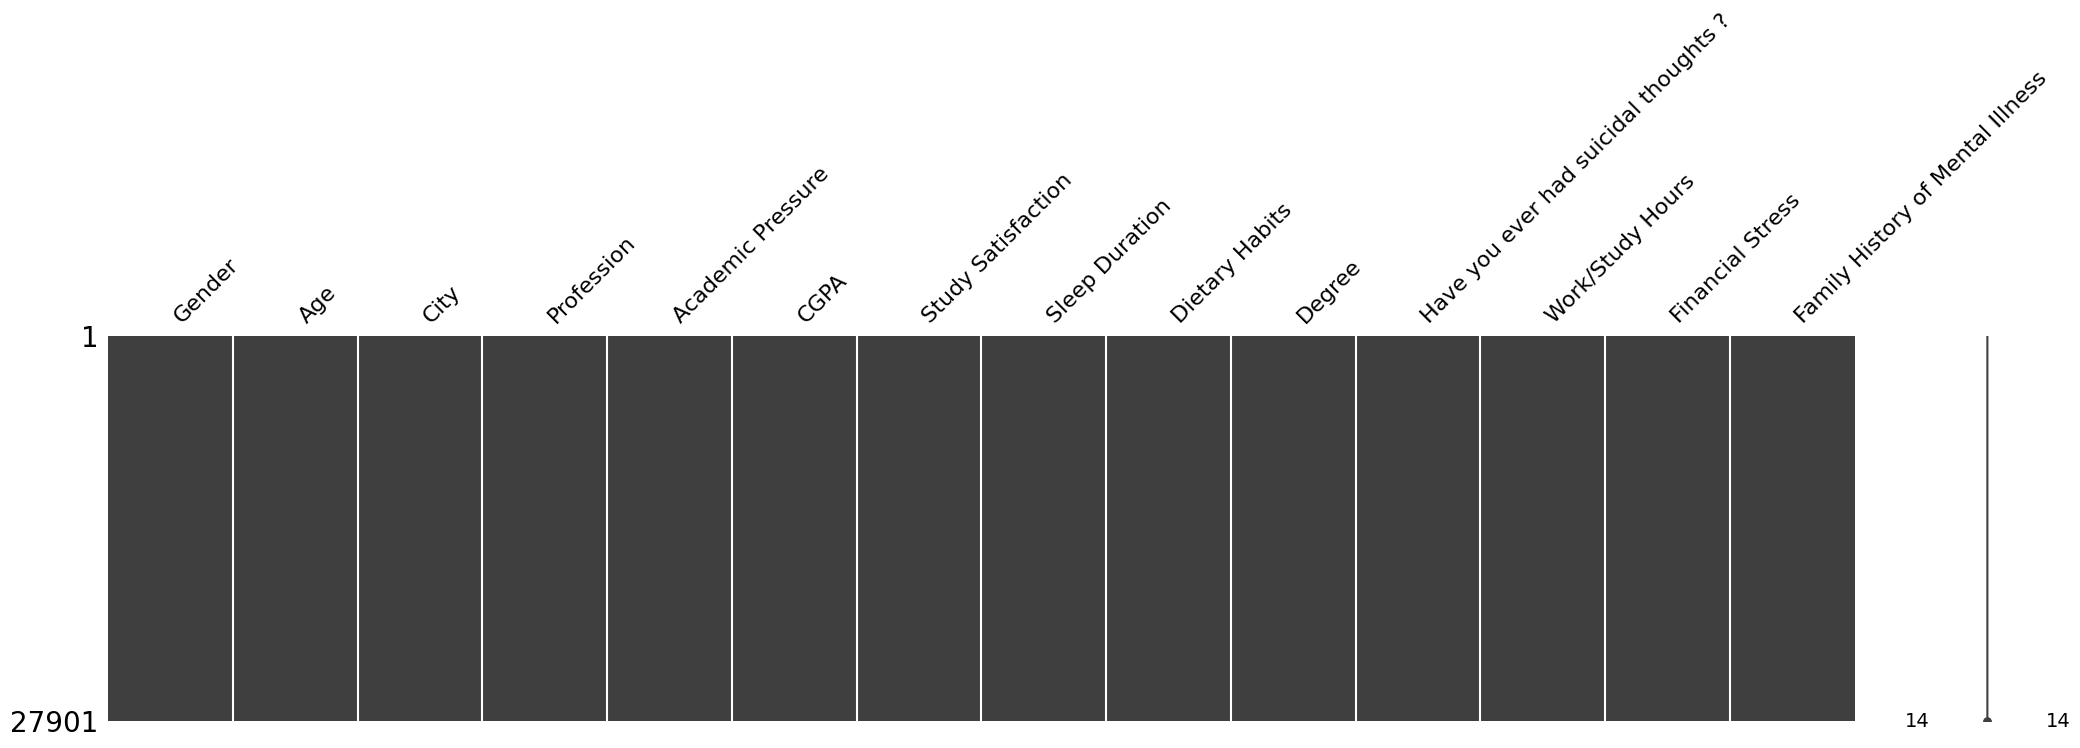

In [92]:
# Visualizar dados faltantes no conjunto de treino.
import missingno as msno
msno.matrix(X, figsize=(25,5));

In [93]:
# Classe tem missing?
Y.isnull().sum()

np.int64(0)

In [94]:
#Divisão de dados em conjutos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [110]:
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

X_train:  (22320, 14)
y_train:  (22320,)


In [95]:
#Normalização dos dados
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Prever casos de Depressão

## Modelos

### RandomForestClassifier


Resultados de Treino
Acurácia:  0.9051971326164875
Kappa:  0.8030514081181795
F1:  0.9206122908381481


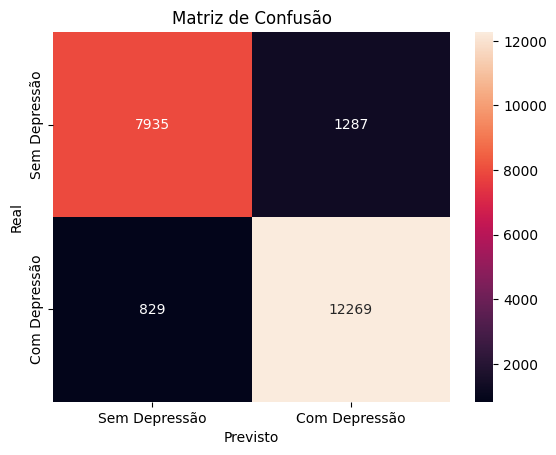

Resultados de Teste
Acurácia:  0.832108941049991
Kappa:  0.6533302069791018
F1:  0.857490494296578


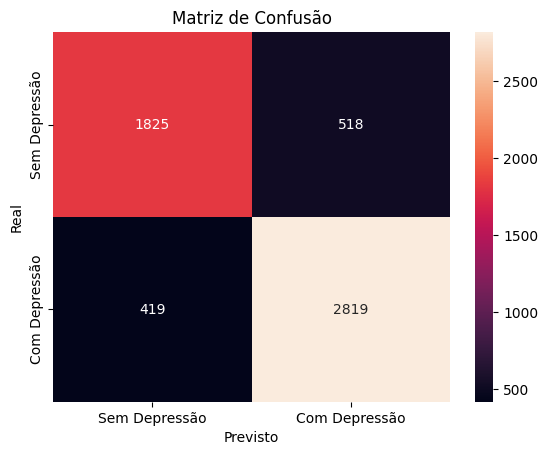

In [96]:
from sklearn.ensemble import RandomForestClassifier

def train(X_train, y_train, seed):
  model = RandomForestClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, 42)


print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

### DecisionTreeClassifier

Resultados de Treino
Acurácia:  0.910483870967742
Kappa:  0.8156434491484124
F1:  0.9234893160756682


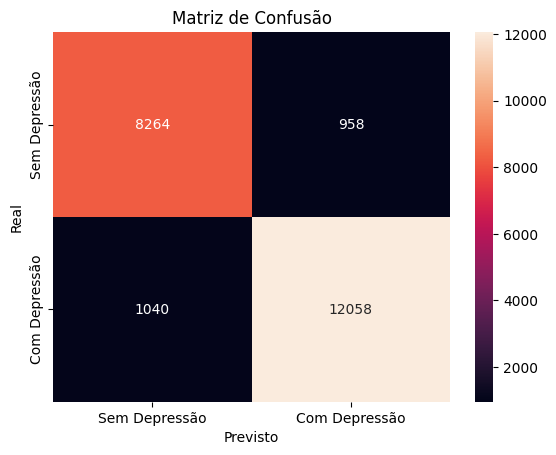

Resultados de Teste
Acurácia:  0.7799677477154632
Kappa:  0.5500711709522202
F1:  0.8084243369734789


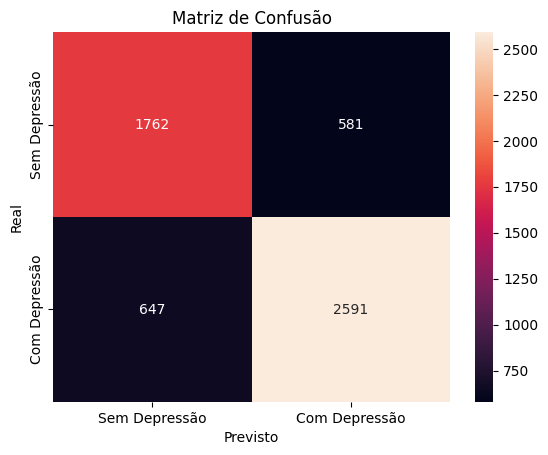

In [97]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed, max_depth=None, min_samples_leaf=1):
  model = DecisionTreeClassifier(max_depth=max_depth,
                                 min_samples_leaf=min_samples_leaf,
                                 random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

#model = train(X_train, y_train, 42)
model = train(X_train, y_train, 42, max_depth=155, min_samples_leaf=5)

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)



### SVM

Resultados de Treino
Acurácia:  0.8606182795698925
Kappa:  0.7099110636769795
F1:  0.8837747973250645


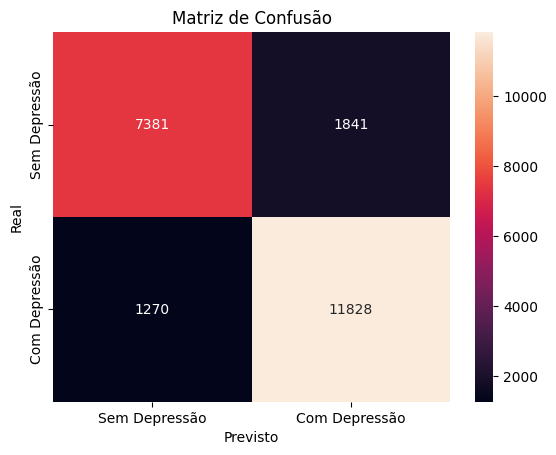

Resultados de Teste
Acurácia:  0.8344382727109837
Kappa:  0.6574285384411085
F1:  0.8602118003025718


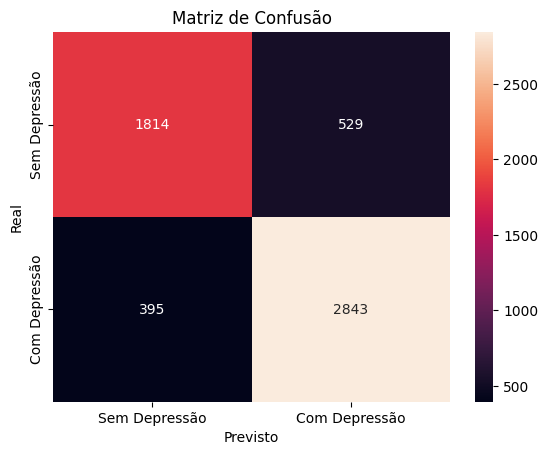

In [98]:
# treinar modelo
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # crio o modelo
  model.fit(X_train, y_train)     # treino o modelo
  return model

model = train(X_train, y_train, 42)

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

### KNeighborsClassifier

Resultados de Treino
Acurácia:  0.8722670250896057
Kappa:  0.734481836110332
F1:  0.8931849687160466


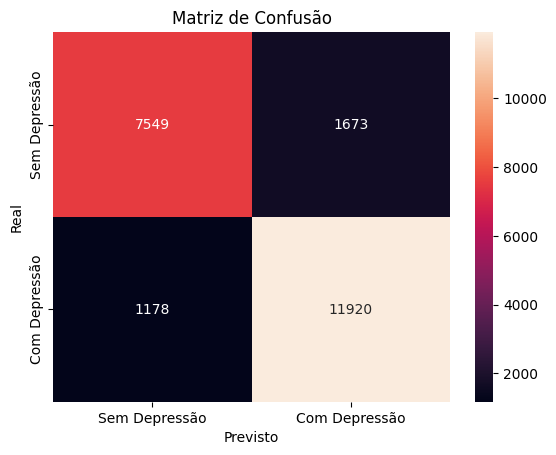

Resultados de Teste
Acurácia:  0.813115929044974
Kappa:  0.6127799744996808
F1:  0.8427559173827831


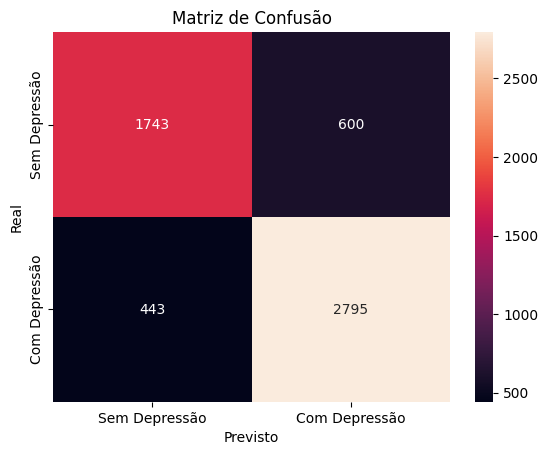

In [99]:
# treinar modelo
from sklearn.neighbors import KNeighborsClassifier

def train(X_train, y_train, X_test, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)  # inferência do teste

  return model, y_pred

model, y_pred = train(X_train, y_train, X_test)

print('Resultados de Treino')
predict_and_evaluate(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate(model, X_test, y_test)

# Prever casos de Pensamentos Suicidas

In [107]:
#Será necessário separar os dados novamente.
X_Pensamentos = dados.drop('Have you ever had suicidal thoughts ?', axis=1)
Y_Pensamentos = dados['Have you ever had suicidal thoughts ?']

print("X Pensamentos suicidas: ",X_Pensamentos.shape)
print("Y Pensamentos suicidas: ",Y_Pensamentos.shape)

X Pensamentos suicidas:  (27901, 14)
Y Pensamentos suicidas:  (27901,)


In [108]:
#Divisão de dados em conjutos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_Pensamentos, Y_Pensamentos, test_size=0.2, random_state=42)

In [109]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelos

### RandomForestClassifier

Resultados de Treino
Acurácia:  0.8221326164874552
Kappa:  0.6188161512954669
F1:  0.858678627367222


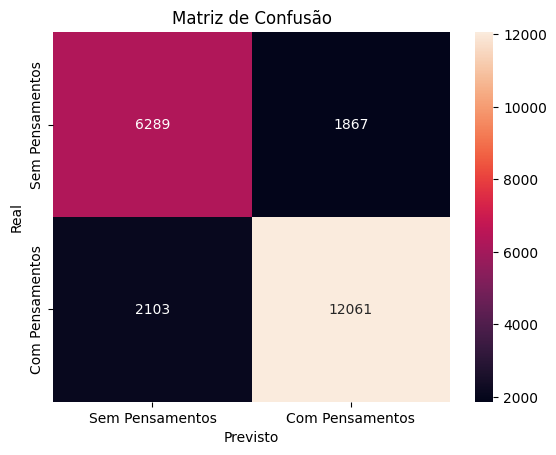

Resultados de Teste
Acurácia:  0.7699337036373409
Kappa:  0.5200878548139996
F1:  0.8094955489614243


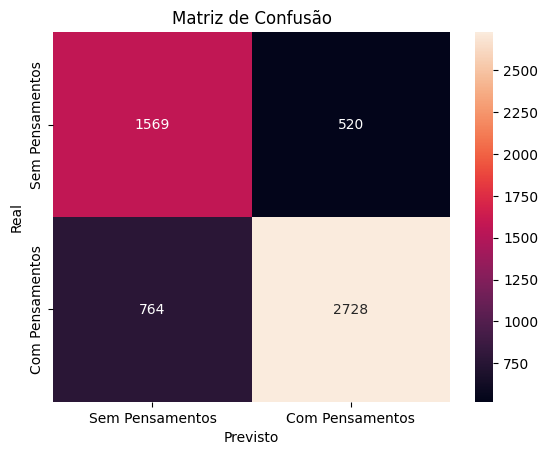

In [103]:
# treinar modelo
from sklearn.ensemble import RandomForestClassifier

def train(X_train, y_train, seed):
  model = RandomForestClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, 42)


print('Resultados de Treino')
predict_and_evaluate_suicide(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate_suicide(model, X_test, y_test)

### DecisionTreeClassifier

Resultados de Treino
Acurácia:  0.8699820788530466
Kappa:  0.71953466041392
F1:  0.8976150155235676


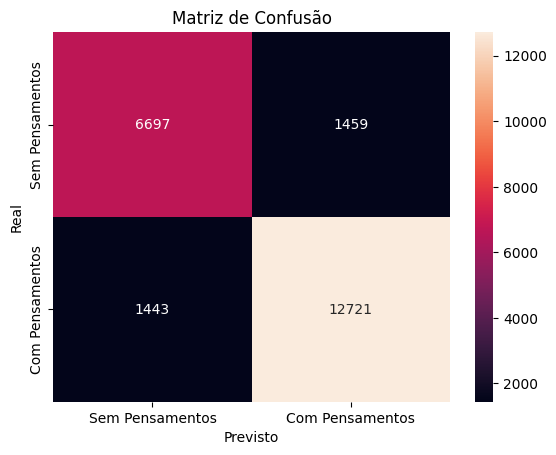

Resultados de Teste
Acurácia:  0.6805232037269306
Kappa:  0.3132540780124835
F1:  0.7472714386959604


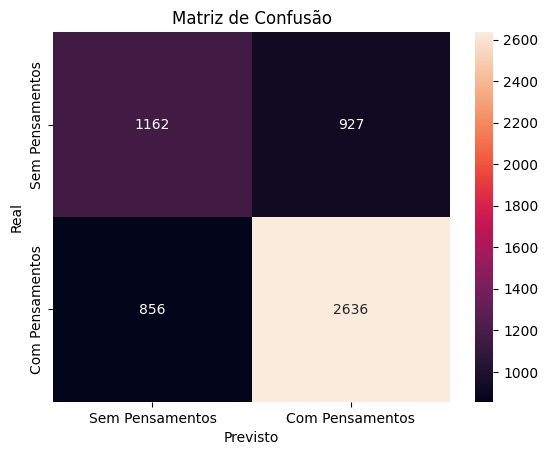

In [104]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed, max_depth=None, min_samples_leaf=1):
  model = DecisionTreeClassifier(max_depth=max_depth,
                                 min_samples_leaf=min_samples_leaf,
                                 random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

#model = train(X_train, y_train, 42)
model = train(X_train, y_train, 42, max_depth=155, min_samples_leaf=5)

print('Resultados de Treino')
predict_and_evaluate_suicide(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate_suicide(model, X_test, y_test)


### SVC

Resultados de Treino
Acurácia:  0.7855286738351255
Kappa:  0.5499895227922482
F1:  0.824426920960939


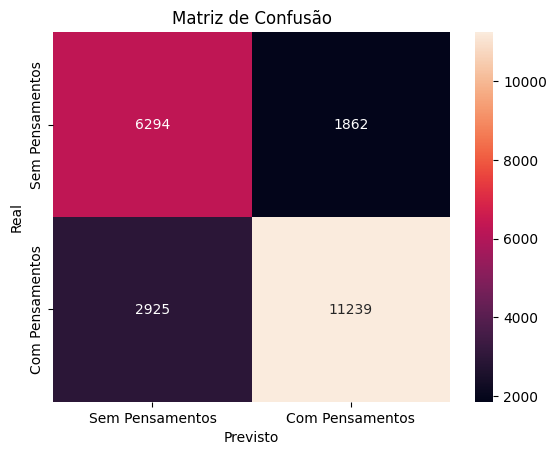

Resultados de Teste
Acurácia:  0.7706504210714926
Kappa:  0.5219422541405644
F1:  0.809863339275104


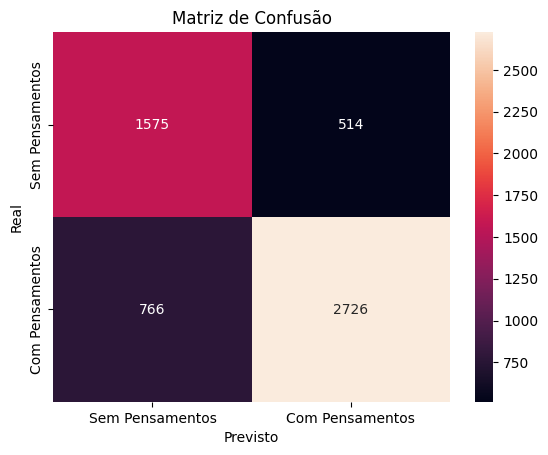

In [105]:
# treinar modelo
from sklearn.svm import SVC

def train(X_train, y_train, seed):
  model = SVC(random_state=seed)  # crio o modelo
  model.fit(X_train, y_train)     # treino o modelo
  return model

model = train(X_train, y_train, 42)

print('Resultados de Treino')
predict_and_evaluate_suicide(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate_suicide(model, X_test, y_test)

### KNeighborsClassifier

Resultados de Treino
Acurácia:  0.8118279569892473
Kappa:  0.5900360354056606
F1:  0.8537808104720791


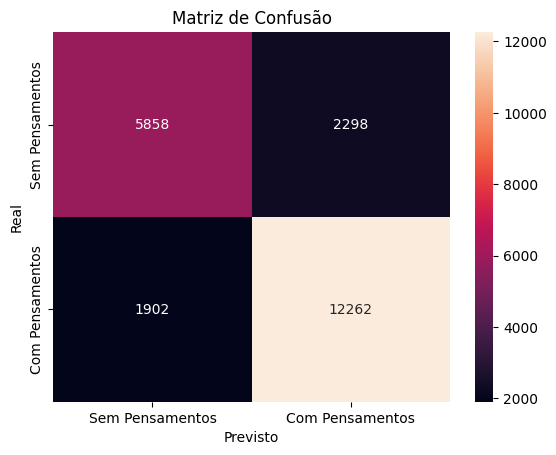

Resultados de Teste
Acurácia:  0.7324852177029206
Kappa:  0.4224910177831225
F1:  0.7896886885476828


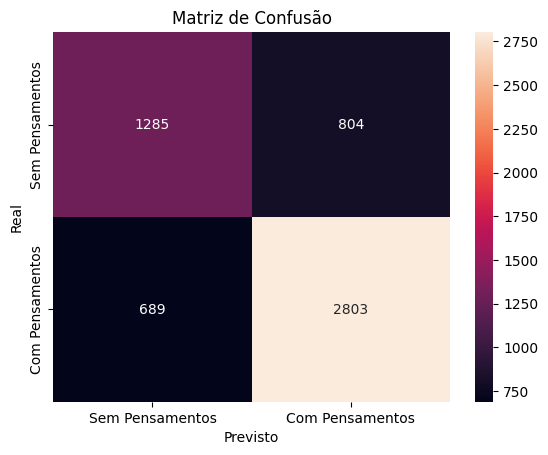

In [106]:
# treinar modelo
from sklearn.neighbors import KNeighborsClassifier

def train(X_train, y_train, X_test, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)  # inferência do teste

  return model, y_pred

model, y_pred = train(X_train, y_train, X_test)

print('Resultados de Treino')
predict_and_evaluate_suicide(model, X_train, y_train)
print('Resultados de Teste')
predict_and_evaluate_suicide(model, X_test, y_test)